# **Importing Libraries**


**os** for handling directories,
**cv2** for image processing and
**numpy** for matrix operations

In [1]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# **Importing Dataset** using kagglehub

In [2]:
import kagglehub
dataset_path = kagglehub.dataset_download('yasserhessein/gender-dataset')


100%|██████████| 1.32G/1.32G [00:15<00:00, 92.2MB/s]

Extracting files...


Using **os** to choose the directory that will be our dataset in this gender detection model

In [3]:
dataset = os.path.join(dataset_path, 'Dataset')
data = os.path.join(dataset, 'Train')

# Now, **preprocessing** the dataset for training

Using sections, we assigned them with index to it.

img_size = 50 is for resizing the image into (50 X 50)

A function **load_images_and_labels** is defined which loads images from dataset, process them and then assign them a label.

We have used the greyscale image and processed it by flattening and stored it with its label.

In [4]:
sections = ['Male', 'Female']
img_size = 50

def load_images_and_labels(dataset_path, sections, img_size):
  data = []
  labels = []
  for label, section in enumerate(sections):
    folder_path = os.path.join(dataset_path, section)
    images = os.listdir(folder_path)
    for img_file in images:
      img_path = os.path.join(folder_path, img_file)
      img = cv2.imread(img_path)
      img = cv2.resize(img, (img_size, img_size))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      data.append(img.flatten())
      labels.append(label)
  return np.array(data), np.array(labels)

images, labels = load_images_and_labels(data, sections, img_size)
images = images / 255.0
images = images.reshape(-1, img_size, img_size, 1)
labels = to_categorical(labels, num_classes=len(sections))

Each section corresponds to a folder which is assigned a label: 0 for Male, 1 from Female.

cv2.imread(img_path) reads the image

cv2.resize() resizes the image

cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) converts the image to grayscale to reduce complexity

img.flatten() flattens the 2D grayscale image into a 1D array

data.append(img.flatten()) and labels.append(label) stores the image with its numeric label

# **Splitting Dataset**

**train_test_split** seperates the images from our dataset for training and testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, stratify=labels, random_state=42)

# **CNN**

A CNN model is created using the function **create_cnn_model** which takes the greyscale image and learn patterns from the images using Convolutional layers

Optimzer **adam** is used for effecient gradient updates.

**Metrics** tracks accuracy of model during training.

In [6]:
def create_cnn_model(input_shape):
  model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(sections), activation='softmax')])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

cnn_model = create_cnn_model((img_size, img_size, 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Training CNN model**

Training CNN model now and evaluating accuracy and loss on validation data during each epoch

**epochs** tells how much times the model will go through the entire dataset to learn the patterns

**batch_size** tells number of images processed before the model updates its weight

In [7]:
history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 457s 101ms/step - accuracy: 0.8875 - loss: 0.2538 - val_accuracy: 0.9521 - val_loss: 0.1216
Epoch 2/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 457s 102ms/step - accuracy: 0.9538 - loss: 0.1208 - val_accuracy: 0.9529 - val_loss: 0.1169
Epoch 3/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 452s 100ms/step - accuracy: 0.9618 - loss: 0.0998 - val_accuracy: 0.9587 - val_loss: 0.1051
Epoch 4/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 499s 100ms/step - accuracy: 0.9666 - loss: 0.0894 - val_accuracy: 0.9603 - val_loss: 0.1063
Epoch 5/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 501s 100ms/step - accuracy: 0.9701 - loss: 0.0809 - val_accuracy: 0.9641 - val_loss: 0.0981
Epoch 6/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 501s 99ms/step - accuracy: 0.9733 - loss: 0.0710 - val_accuracy: 0.9639 - val_loss: 0.1052
Epoch 7/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 506s 100ms/step - accuracy: 0.9753 - loss: 0.0652 - val_accuracy: 0.9659 - val_loss: 0.1044
Epoch 8/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 450s 100ms/step - acc

Evaluating performance of model on training and testing dataset

In [8]:
train_loss, train_accuracy = cnn_model.evaluate(X_train, y_train)
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Training Accuracy: {train_accuracy * 100:.3f}%")
print(f"Test Accuracy: {test_accuracy * 100:.3f}%")

4500/4500 ━━━━━━━━━━━━━━━━━━━━ 123s 27ms/step - accuracy: 0.9919 - loss: 0.0243
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9640 - loss: 0.1245
Training Accuracy: 99.207%
Test Accuracy: 96.588%


Visualising using **matplotlib**

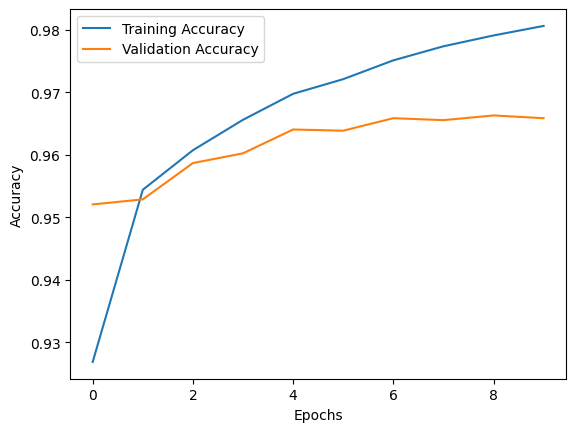

In [43]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

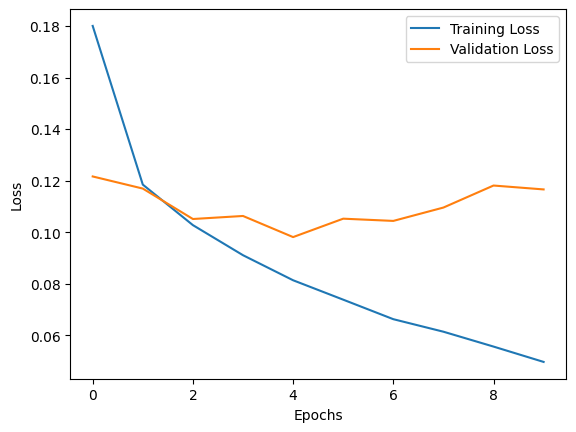

In [44]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Haar Cascade for Detection**

**Haar Cascade classifier** is a pre-trained model provided by OpenCV used for face (object) detection.

**face_cascade** initializes a Haar Cascade classifier that detects faces in an image.

In [9]:
haarcascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haarcascade_path)

A function **detect_and_predict_gender** is defined to detect faces in an image and predict their gender using a trained model

It also annotate the image with boxes and their gender labels and their confidence percentage.
This will help in understanding the model's reliability for each detection.

**face = gray[y:y+h, x:x+w]** extracts the region of the detected face

**sections[prediction[0]]** maps the prediction back to its label i.e. 'Male' or 'Female'

**cv2.rectangle()** draws rectangle around the detected face

Now defining the four point for making the rectangle with
(x, y) as the top-left corner and (x+w, y+h) as the bottom-right corner

(0, 0, 255) specifies the color red and 2 is the thickness

**cv2.FONT_HERSHEY_SIMPLEX** specifies the font and parameters that control size, color, and thickness

In [47]:
def detect_and_predict_gender(image_path, cnn_model):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

  for (x, y, w, h) in faces:
    face = gray[y:y+h, x:x+w]
    face_resized = cv2.resize(face, (img_size, img_size)).reshape(img_size, img_size, 1) / 255.0
    face_resized = np.expand_dims(face_resized, axis=0)

    probabilities = cnn_model.predict(face_resized)[0]
    predicted_class = np.argmax(probabilities)
    gender = sections[predicted_class]
    confidence = probabilities[predicted_class] * 100
    label = f"{gender}({confidence:.1f}%)"

    # Draw box with label
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
  return img

Processing series of images to perform gender detection on each one which will display the results, and save the processed images with annotations to given Google Drive path.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


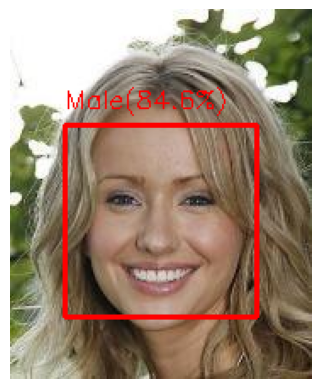

Processed and saved: /content/drive/MyDrive/Output Images/annotated_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


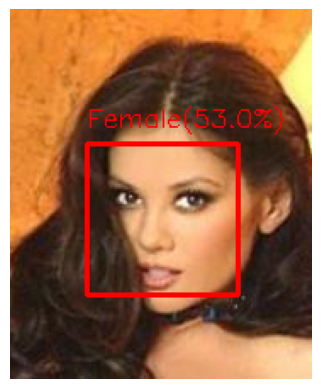

Processed and saved: /content/drive/MyDrive/Output Images/annotated_2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


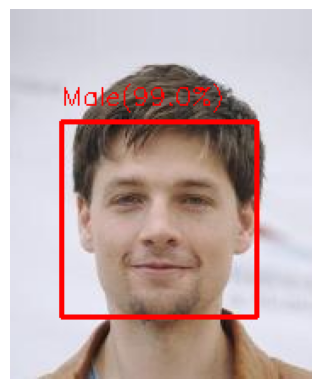

Processed and saved: /content/drive/MyDrive/Output Images/annotated_3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


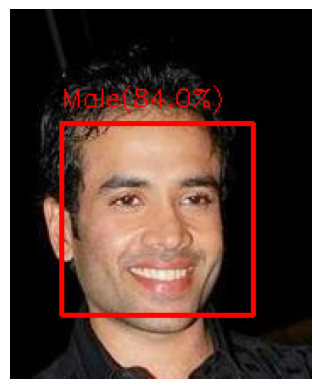

Processed and saved: /content/drive/MyDrive/Output Images/annotated_4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


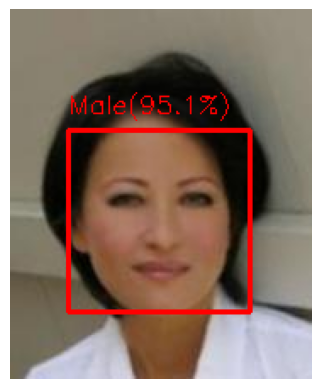

Processed and saved: /content/drive/MyDrive/Output Images/annotated_5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


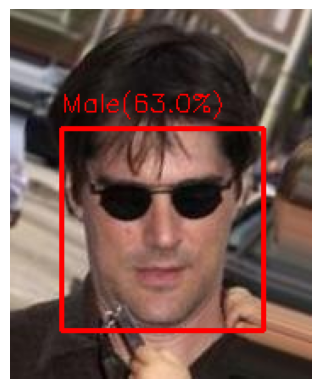

Processed and saved: /content/drive/MyDrive/Output Images/annotated_6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


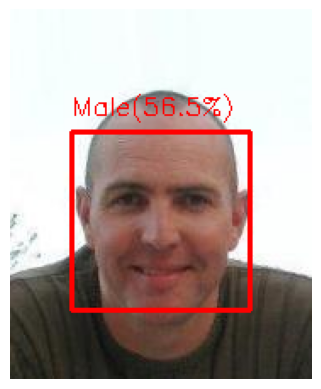

Processed and saved: /content/drive/MyDrive/Output Images/annotated_7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


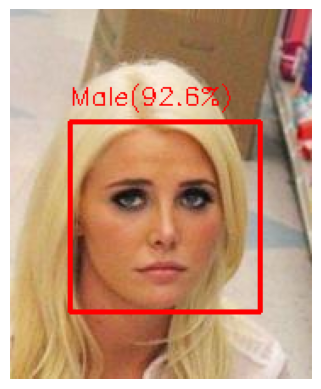

Processed and saved: /content/drive/MyDrive/Output Images/annotated_8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


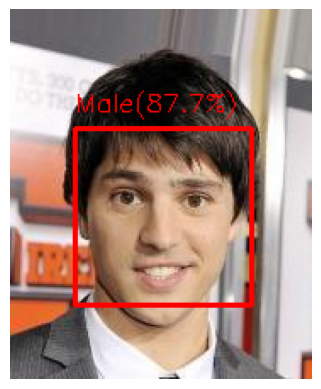

Processed and saved: /content/drive/MyDrive/Output Images/annotated_9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


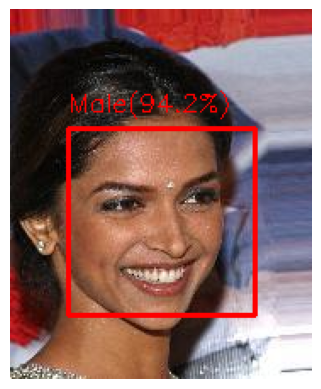

Processed and saved: /content/drive/MyDrive/Output Images/annotated_10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


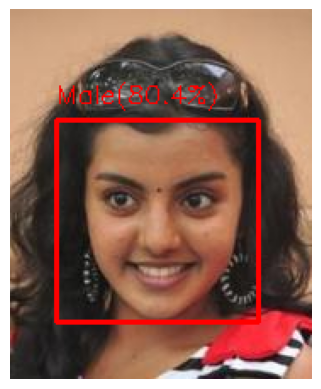

Processed and saved: /content/drive/MyDrive/Output Images/annotated_11.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


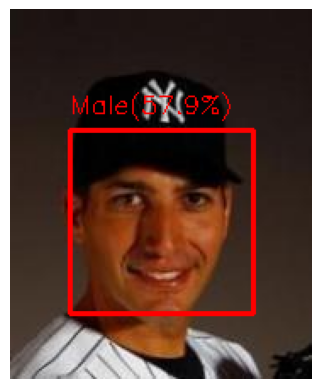

Processed and saved: /content/drive/MyDrive/Output Images/annotated_12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


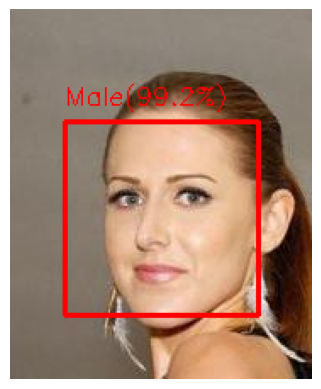

Processed and saved: /content/drive/MyDrive/Output Images/annotated_13.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


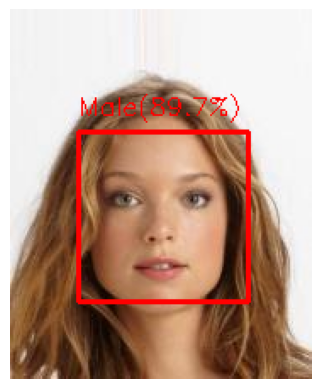

Processed and saved: /content/drive/MyDrive/Output Images/annotated_14.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


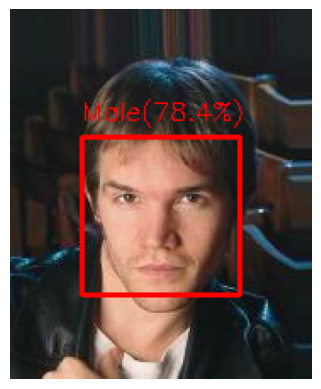

Processed and saved: /content/drive/MyDrive/Output Images/annotated_15.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


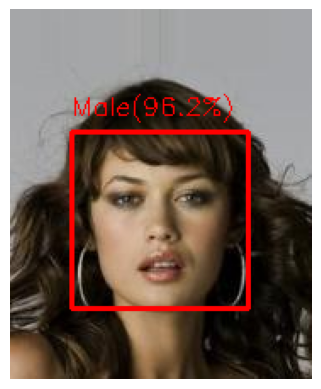

Processed and saved: /content/drive/MyDrive/Output Images/annotated_16.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


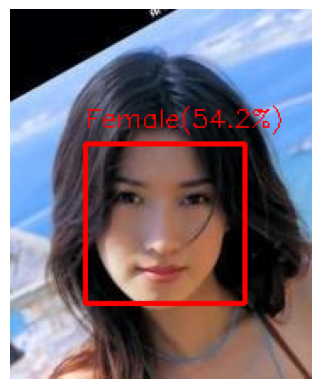

Processed and saved: /content/drive/MyDrive/Output Images/annotated_17.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


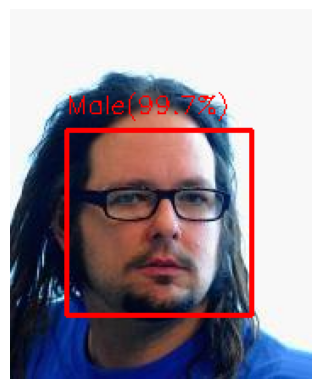

Processed and saved: /content/drive/MyDrive/Output Images/annotated_18.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


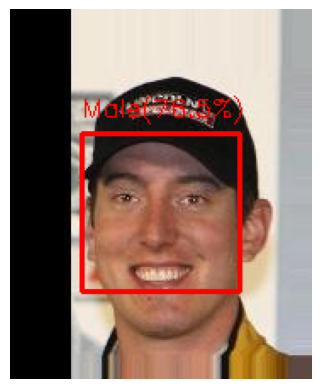

Processed and saved: /content/drive/MyDrive/Output Images/annotated_19.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


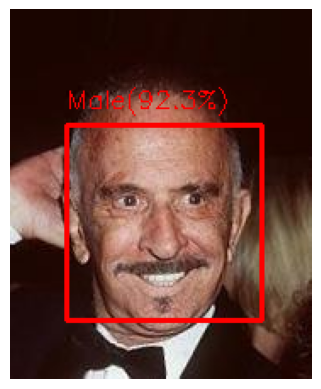

Processed and saved: /content/drive/MyDrive/Output Images/annotated_20.jpg


In [48]:
from google.colab import drive
drive.mount('/content/drive')

for i in range(1, 21):
    image_path = f'/content/drive/My Drive/InputImages/{i}.jpg'
    try:
      output_image = detect_and_predict_gender(image_path, cnn_model)
      plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
      plt.axis('off')
      plt.show()

      output_path = f'/content/drive/MyDrive/Output Images/annotated_{i}.jpg'
      cv2.imwrite(output_path, output_image)
      print(f"Processed and saved: {output_path}")
    except Exception as e:
      print(f"Error processing {image_path}: {e}")

I tried making this gender detection model 4-5 times but at first attempt, result was very inaccurate cause all the pictures were predicted as male. In my second attempt, I used OpenCV but that also didn't resulted in any betterment. In my third and fourth attempt, there was some runtime error coming again and again. So, I tried using
logistic regression but result was yet not satisfactory. Finally, I tried it using CNN model but again some images are labelled with incorrect gender. Most tough part was running the cell with 10 epochs cause it took nearly 1.5 hrs.

After using online resources, I tried live detection but was always getting the error of unable to access camera. When I searched for the way to resolve it, I found it very confusing. So, I left that part.